<a href="https://colab.research.google.com/github/bon-u/S2project/blob/main/AI07_S2P_%EA%B5%AC%EB%B3%B8%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 82 kB 309 kB/s 
     |████████████████████████████████| 106 kB 14.6 MB/s 
     |████████████████████████████████| 245 kB 15.0 MB/s 
     |████████████████████████████████| 4.7 MB 55.0 MB/s 
     |████████████████████████████████| 675 kB 43.6 MB/s 
     |████████████████████████████████| 102 kB 60.2 MB/s 
     |████████████████████████████████| 62 kB 628 kB/s 
     |████████████████████████████████| 812 kB 40.8 MB/s 
     |████████████████████████████████| 38.2 MB 26 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ebc5408055a30d12d6ee1e5f3b5b251158b50acb5b9374a762ad066d33fe93b1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=ea02a0e1e88b1f00d65d7ca44e611351f111f5d0d4d717eae15c3eef958d57e7
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e29

     |████████████████████████████████| 34.0 MB 43 kB/s 
     |████████████████████████████████| 13.1 MB 6.9 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=e490b8816ec2944b5cb358ba8eeb9e2f3bc2d2863f7b2e31f7a59b61368badc4
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.13.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 371 kB 16.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509237 sha256=4c6a1cba615364186ec0ae8b29932ba921732b00f9dcaba1b83e3f138ae1ff50
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [70]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [71]:
import pandas as pd
dt=pd.read_csv('winequalityN.csv')

In [72]:
dt

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [73]:
dt.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [74]:
dt['acidity']=df['fixed acidity']+dt['volatile acidity']+dt['sulphates']
dt['sulfur dioxide']=dt['total sulfur dioxide']+dt['free sulfur dioxide']

In [75]:
dt['type'].unique()

array(['white', 'red'], dtype=object)

In [76]:
dt.duplicated().sum()

185

In [77]:
dtd=dt.drop_duplicates()
df=dtd.replace({'white':0,'red':1})
df=df.dropna()
target='quality'
data=df.drop([target],axis=1)
tg=df[target]

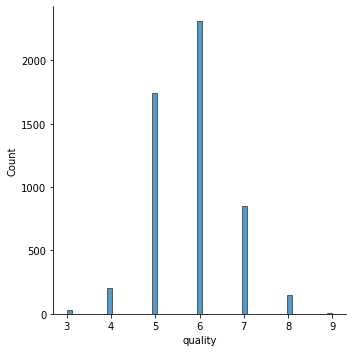

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(tg)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(data,tg,test_size=0.2, random_state=10)

In [81]:
from IPython.display import display, HTML
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))
polynomial_degrees = [1,2, 3]
train_r2s = []
test_r2s = []
for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    print(f'Degree={degree}')
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_val, y_val)
    display(HTML(f'<b style="color: blue">train R2 {train_r2:.3f}</b>'))
    display(HTML(f'<b style="color: red">test R2 {test_r2:.3f}</b>'))    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

Degree=1


Degree=2


Degree=3


In [82]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error, r2_score
selector = SelectKBest(score_func=f_regression, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_train_selected.shape, X_val_selected.shape

((4236, 2), (1059, 2))

In [83]:
all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['density', 'alcohol'], dtype='object')
Unselected names:  Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'acidity', 'sulfur dioxide'],
      dtype='object')


In [69]:
feature=['density', 'alcohol']
X_train_feature=X_train[feature]
X_val_feature=X_val[feature]

In [93]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    Ridge()
)
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'ridge__alpha': [0.1, 0.15, 0.2], 
}
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)
clf.fit(X_train_feature, y_train);


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.6s finished


In [94]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'ridge__alpha': 0.2}
MAE:  0.6104553356688931
